In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package','Repack','Mostly Low','Mostly High']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
new_pumpkins.dropna(inplace=True)
cat_columns = ['Color','Origin','Item Size','Variety','City Name','Package','Repack']
label_encoder = LabelEncoder()
for col in cat_columns:
    new_pumpkins[col] = label_encoder.fit_transform(new_pumpkins[col])
    
new_pumpkins.dropna(inplace=True)
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 2 to 1624
Data columns (total 9 columns):
City Name      946 non-null int32
Package        946 non-null int32
Variety        946 non-null int32
Mostly Low     946 non-null float64
Mostly High    946 non-null float64
Origin         946 non-null int32
Item Size      946 non-null int32
Color          946 non-null int32
Repack         946 non-null int32
dtypes: float64(2), int32(7)
memory usage: 48.0 KB


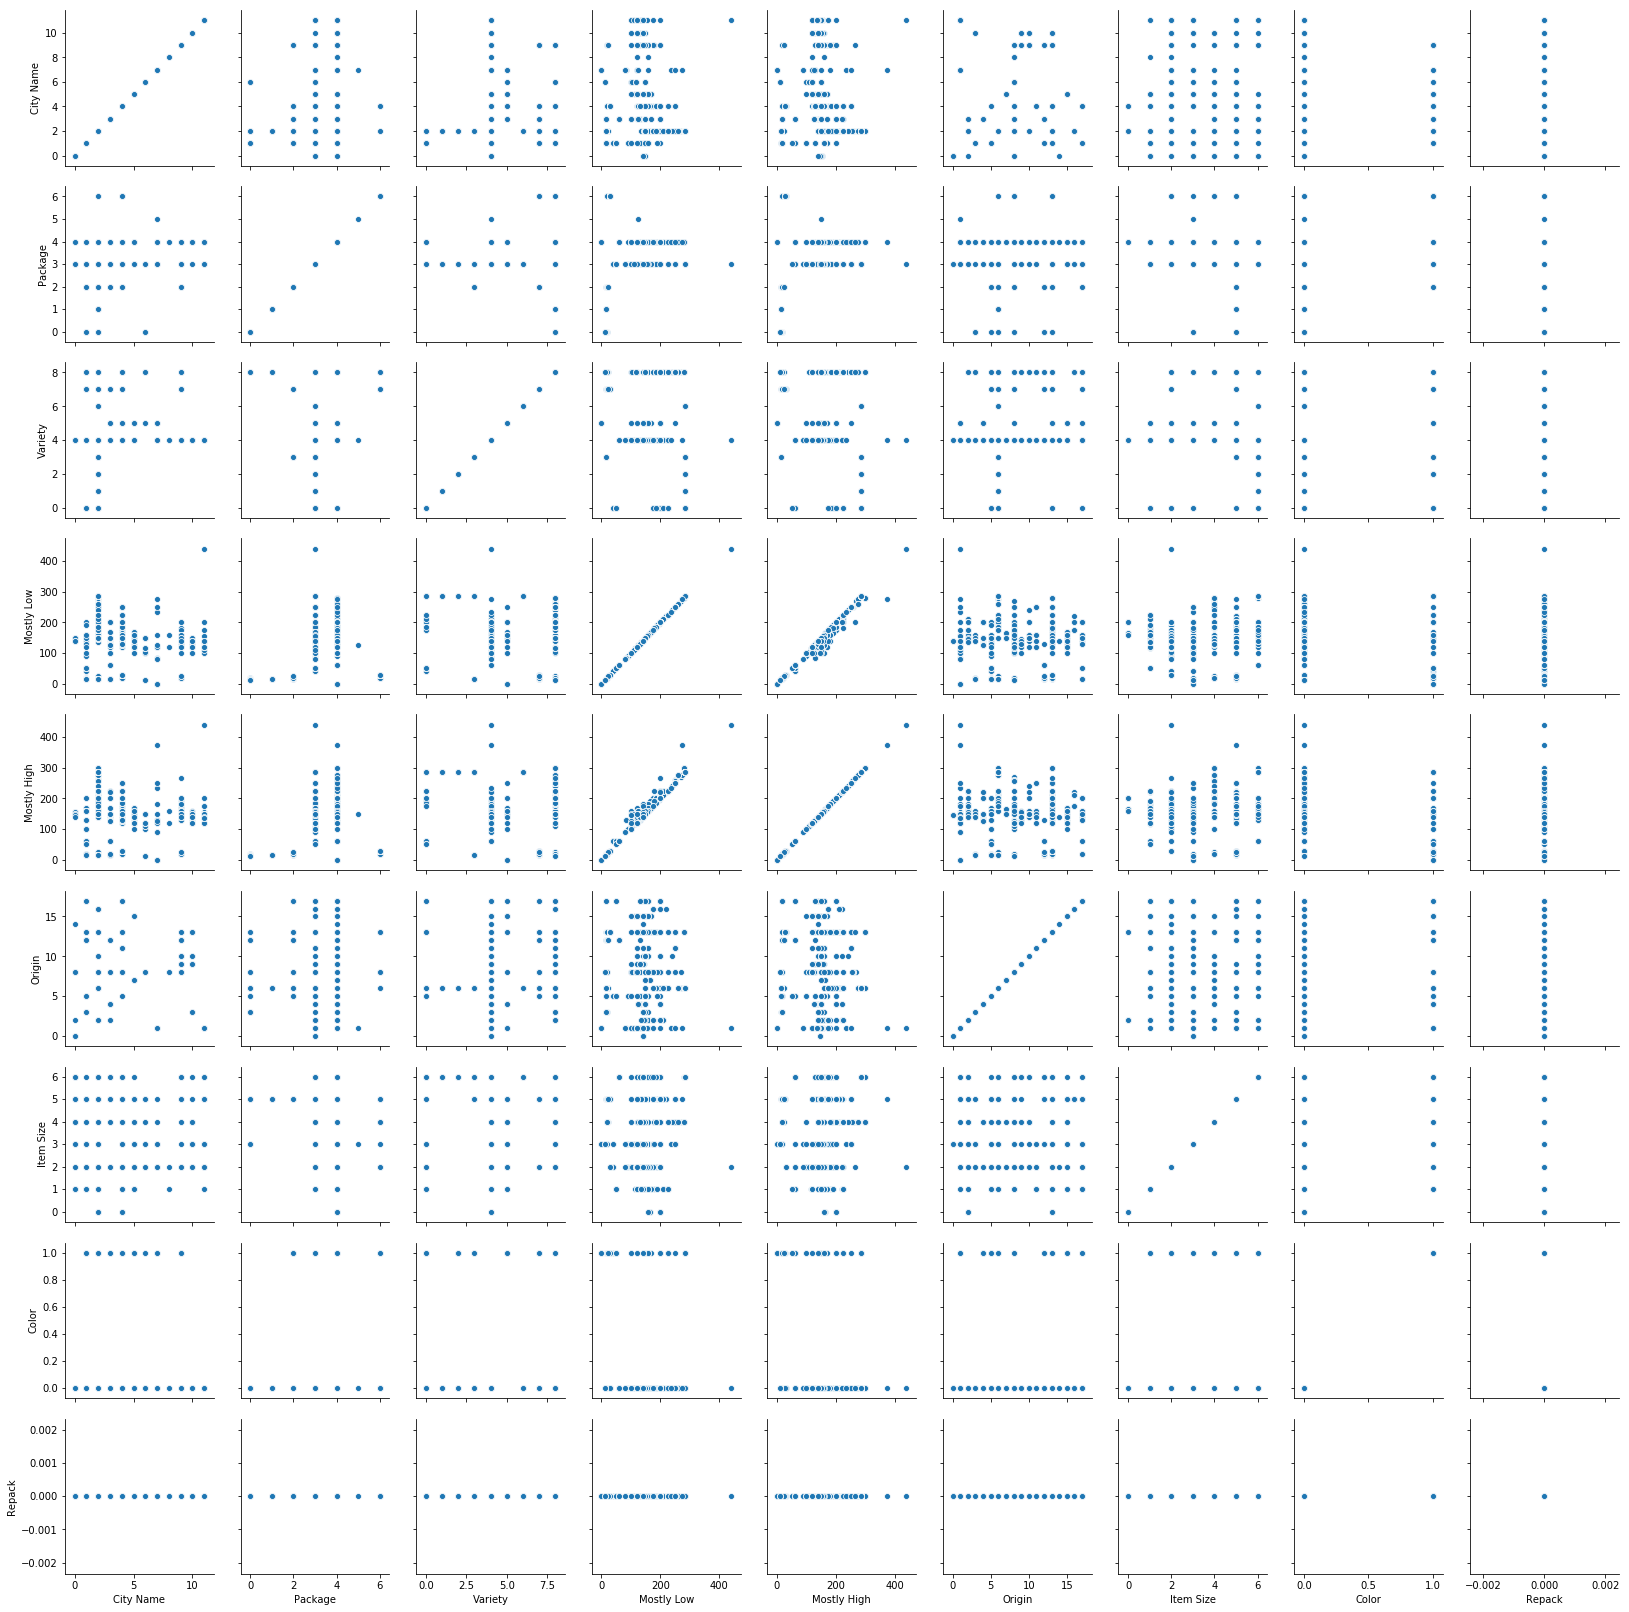

In [5]:
view = sns.PairGrid(new_pumpkins)
view.map(sns.scatterplot)

In [6]:
new_pumpkins.head()

,City Name,Package,Variety,Mostly Low,Mostly High,Origin,Item Size,Color,Repack
2,1,3,4,160.0,160.0,3,3,0,0
3,1,3,4,160.0,160.0,17,3,0,0
4,1,3,4,90.0,100.0,5,2,0,0
5,1,3,4,90.0,100.0,5,2,0,0
6,1,4,4,160.0,170.0,5,3,0,0


In [7]:
selected_features = ['Origin','Item Size','Variety','City Name','Package','Mostly High','Mostly Low','Repack']
X = new_pumpkins[selected_features]
y = new_pumpkins['Color']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(f'Classification report: \n {classification_report(y_test,predictions)}')
print(f'Predicted labels: {predictions}')
print(f'Accurary: {accuracy_score(y_test,predictions):3.3}')

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       170
           1       0.12      0.05      0.07        20

   micro avg       0.86      0.86      0.86       190
   macro avg       0.51      0.50      0.50       190
weighted avg       0.81      0.86      0.84       190

Predicted labels: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1]
Accurary: 0.863


C:\Users\BALA ABDULJALIL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6638235294117647
